<h1>Covertype Data Set</h1>

Name: Jonathan Menahem <br>
ID: 203772611 <br>


<h2>Links:</h2>

[**Problem description and database**](https://archive.ics.uci.edu/ml/datasets/covertype)

[**Jupyter Notebook to read data**](https://drive.google.com/file/d/1T-03NBNnec5-acdGrWxBfwW14enWPobv/view)

[**Markdown syntax**](https://www.markdownguide.org/basic-syntax/)

In [323]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import os
import wget
from pathlib import Path
import shutil
import gzip
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

np.random.seed(0)


<h1>Data Exploration</h1>

<h2>1. Downloading the dataset into dataframe</h2>

In [324]:
# creating column names for data
target = "Covertype"

bool_columns = [
    "Wilderness_Area1", "Wilderness_Area2", "Wilderness_Area3",
    "Wilderness_Area4", "Soil_Type1", "Soil_Type2", "Soil_Type3", "Soil_Type4",
    "Soil_Type5", "Soil_Type6", "Soil_Type7", "Soil_Type8", "Soil_Type9",
    "Soil_Type10", "Soil_Type11", "Soil_Type12", "Soil_Type13", "Soil_Type14",
    "Soil_Type15", "Soil_Type16", "Soil_Type17", "Soil_Type18", "Soil_Type19",
    "Soil_Type20", "Soil_Type21", "Soil_Type22", "Soil_Type23", "Soil_Type24",
    "Soil_Type25", "Soil_Type26", "Soil_Type27", "Soil_Type28", "Soil_Type29",
    "Soil_Type30", "Soil_Type31", "Soil_Type32", "Soil_Type33", "Soil_Type34",
    "Soil_Type35", "Soil_Type36", "Soil_Type37", "Soil_Type38", "Soil_Type39",
    "Soil_Type40"
]

int_columns = [
    "Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology",
    "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways",
    "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm",
    "Horizontal_Distance_To_Fire_Points"
]

feature_columns = (
    int_columns + bool_columns + [target])

In [325]:
# importing dataset into a variable named 'data'

data = pd.read_csv('forest-cover-type.csv', header=None, names=feature_columns)
#data = original_data.sample(n=15120)

<h2>2. Review of the different features</h2>

In [326]:
# dataframe's features

data.columns.drop('Covertype')

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [327]:
# unique labels for Covertype as follows
# 1 - Spruce/Fir - אשוחית/אשוח
# 2 - Lodgepole Pine - אורן לודג'פול
# 3 - Ponderosa Pine - אורן פונדרוסה
# 4 - Cottonwood/Willow - כותנה/ערבה
# 5 - Aspen - צַפצָפָה רַעֲדָנִית
# 6 - Douglas-fir - אשוח-דאגלס
# 7 - Krummholz - קרומהולץ

data.Covertype.unique()

array([5, 2, 1, 7, 3, 6, 4], dtype=int64)

In [328]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

All observations seems complete with no missing data so there is no need to make changes to the dataset

In [329]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Covertype
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


## The next section has been commented because it takes a lot of time to proccess.
## The result is saved in the file "pandas_profiling.html"

In [330]:
# pandas profiling report

#import pandas_profiling as pp

#profile = pp.ProfileReport(data, title = 'Pandas Profiling report of data', html = {'style':{'full_width': True}})
#profile.to_file("pandas_profiling.html")
#profile

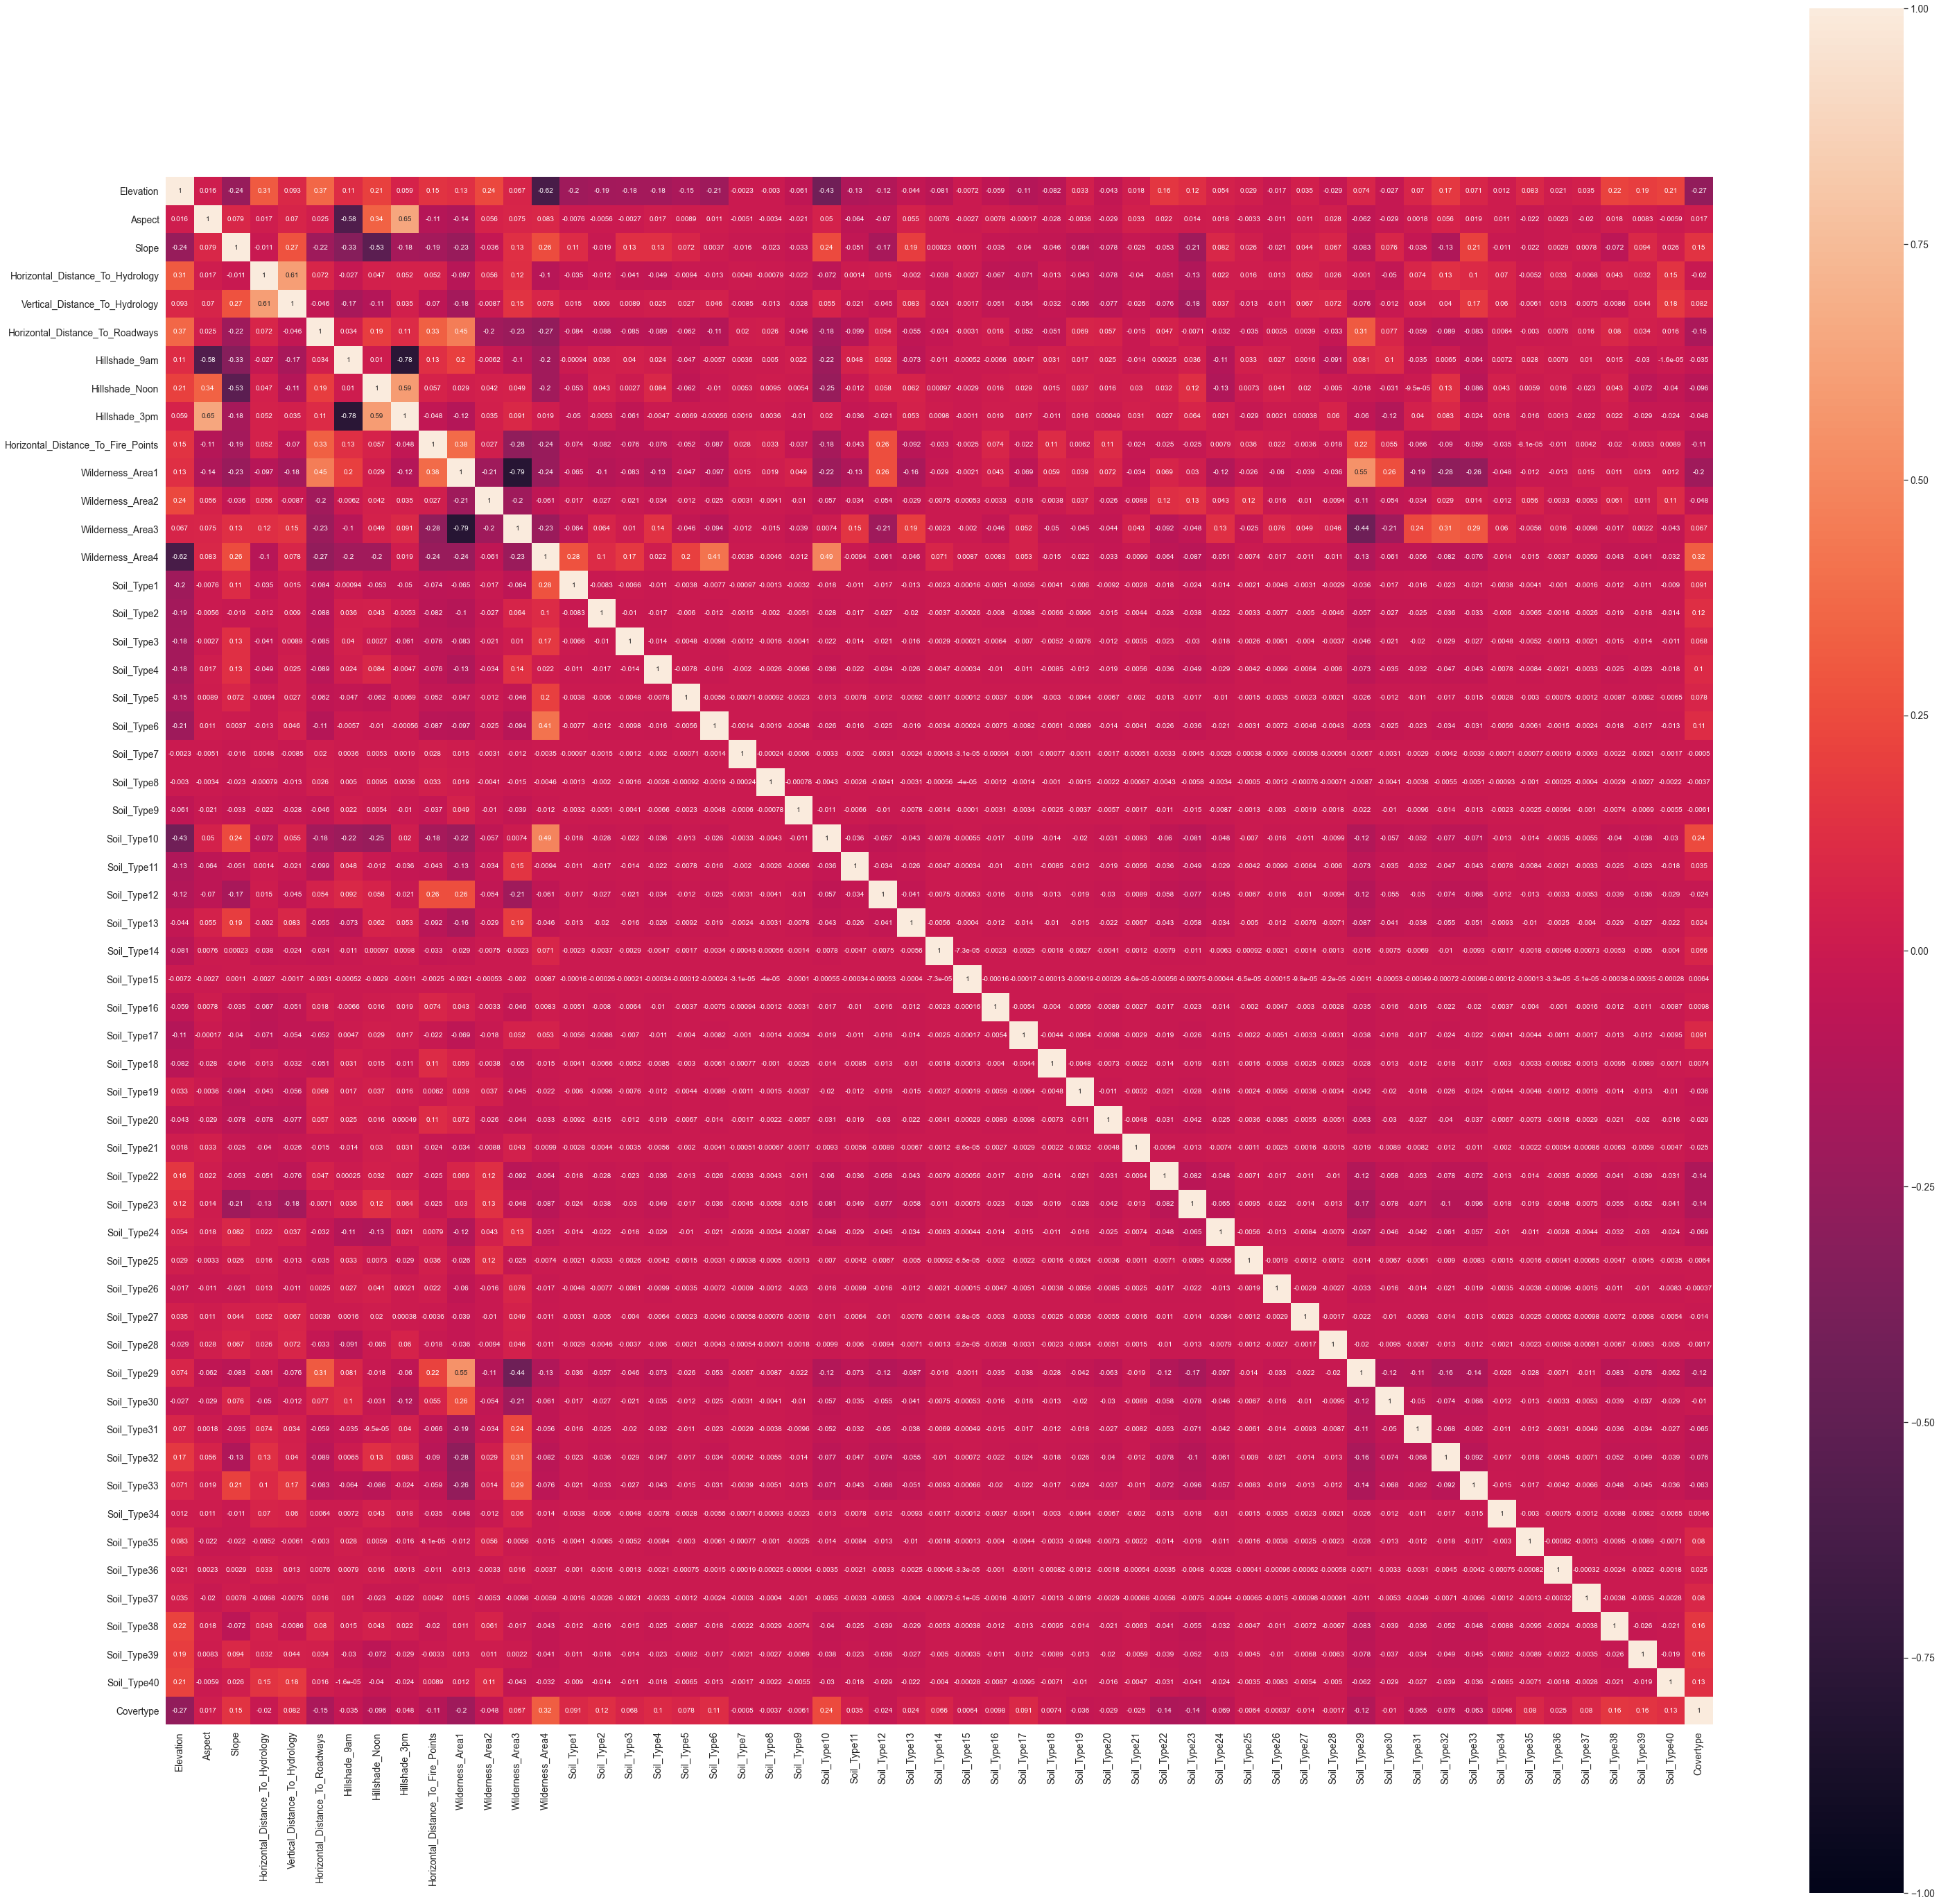

In [331]:
# displaying the correlation matrix 

matrix = pd.get_dummies(data)

plt.figure(figsize=(50, 50))
corrMatrix = matrix.corr()
sns.heatmap(corrMatrix, vmin=-1, vmax=1, square=True, annot=True)
plt.show()

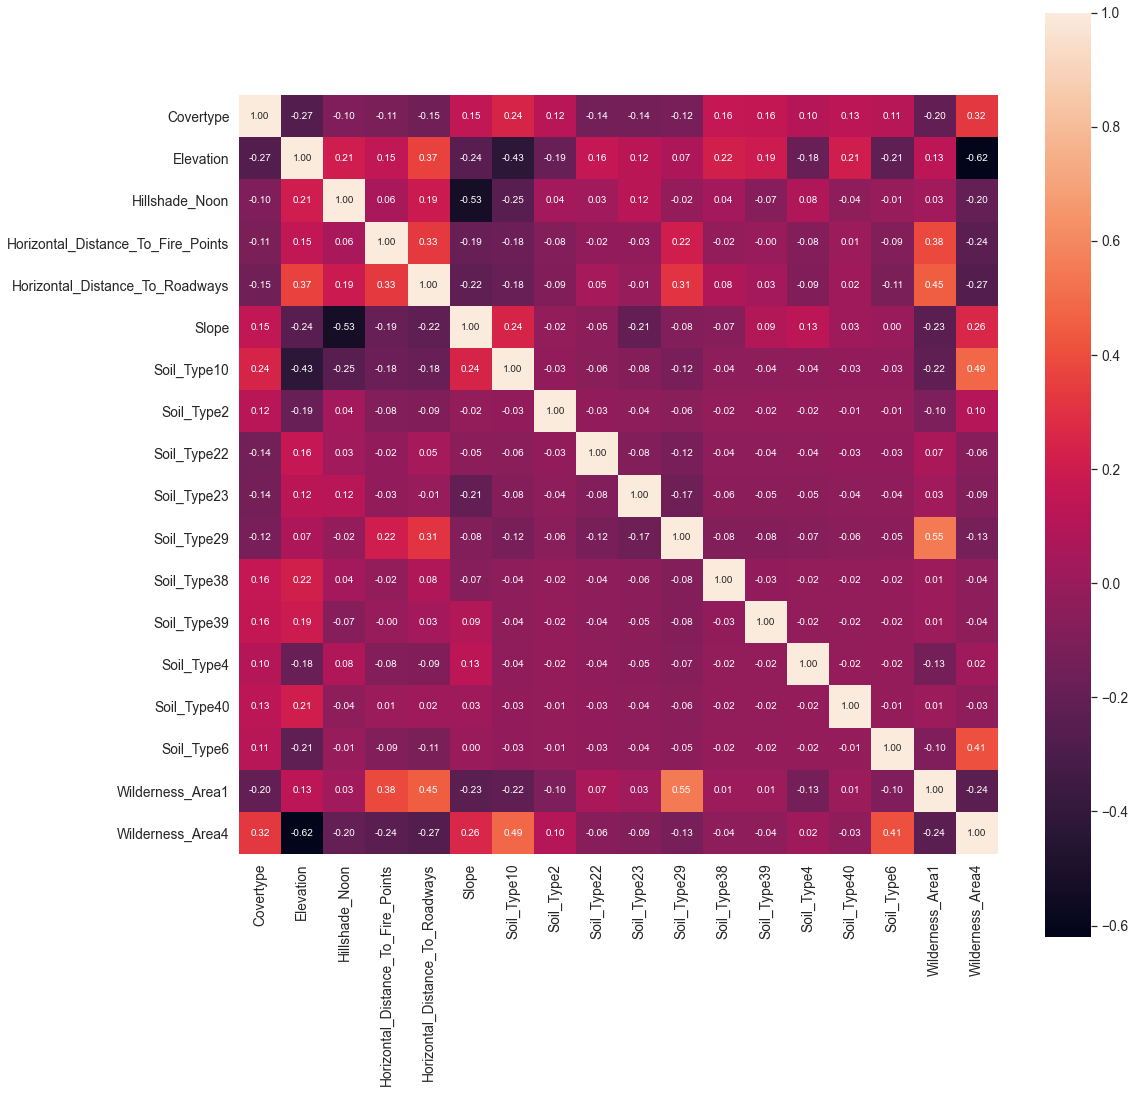

In [358]:
# correlation matrix of 'k' higly correlated features (correlated with 'Covertype')
# I chose all the featuers above abs(0.1)

plt.figure(figsize=(17, 17))
k_high = 10 # number of variables for heatmap - high
k_low = 8 # number of variables for heatmap - low
largest = corrMatrix.nlargest(k_high, 'Covertype')['Covertype']
smallest = corrMatrix.nsmallest(k_low, 'Covertype')['Covertype']
abs_high = largest + smallest
cols = abs_high.index
cm = np.corrcoef(matrix[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [360]:
# creating sorted data with th relevant features from the heatmap above

sorted_data = data.filter(cols)

<h1>Model Development</h1>

In [361]:
# deviding the data into labels and features in order to split the data properly

labels = sorted_data.drop(['Covertype'] , axis = 1) # labels only ('Covertype')

features = sorted_data['Covertype']

In [362]:
# splitting the data into train, validation and test (70:15:15)

# splitting sorted data to train 85% and test 15% :
train_temp_labels, test_labels, train_temp_features, test_features = train_test_split(labels, features, test_size=0.15) 

# splitting train data output to new train data containing 70% of total data and 15% validation data:
train_labels, val_labels, train_features, val_features = train_test_split(train_temp_labels, train_temp_features, test_size=0.176) 

In [363]:
# a table to contain all the results for model training, validation and test for later comparison

scores = pd.DataFrame(columns=['Train Accuracy','Validation Accuracy','Test Accuracy'],index=['Forest','XGBoost', 'TabNet'])

# Random Forest

In [340]:
# here we are using a nested for loop to test the best hyperparameters for 'max_depth', 'min_samples_split', 'min_samples_leaf' for the best results 
# accuracy is tested on validation set only 
from tqdm import tqdm

best_params = None
best_tree = None
best_accuracy = None
for max_depth in tqdm(range(2,15)):
    for min_samples_split in range(2, 10):
        for min_samples_leaf in range(1, 10):
            for criterion in ('gini', 'entropy'):
                params = {'criterion': criterion, 'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf, 'min_samples_split': min_samples_split}
                forest = RandomForestClassifier(n_jobs=4)
                forest.fit(train_labels, train_features)
                accuracy = forest.score(val_labels, val_features)
                if best_accuracy is None or accuracy > best_accuracy:
                    best_params = params
                    best_forest = forest
                    best_accuracy = accuracy

print(f'Best tree validation accuracy: {best_accuracy}')
print(f'Best tree validation params: {best_params}')

  0%|          | 0/13 [02:21<?, ?it/s]


KeyboardInterrupt: 

In [356]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_jobs=4)
forest.fit(train_labels, train_features)

scores.at['Forest','Train Accuracy'] = forest.score(train_labels, train_features)
scores.at['Forest','Validation Accuracy'] = forest.score(val_labels, val_features)
scores.at['Forest','Test Accuracy'] = forest.score(test_labels, test_features)

In [357]:
scores

,Train Accuracy,Validation Accuracy,Test Accuracy
Forest,1.0,0.953532,0.954333
XGBoost,NaN,NaN,NaN
TabNet,NaN,NaN,NaN
